In [158]:
%matplotlib widget
%matplotlib inline
import ipywidgets as widgets
import matplotlib.pyplot as plt
path_in = "/mnt/faststorage/jintao/HNSCC/hecktor2021_train/resampled/" #change to your train folder



## CT statistics

In [118]:
from multiprocessing import Pool
import glob
import numpy as np
import SimpleITK as sitk


def get_image_stats(pt):
    #_ct.nii.gz

    print("processing patient no. ", pt)

    CT_path = path_in + pt +'_ct.nii.gz'
    PET_path = path_in + pt +'_pt.nii.gz'


    pet_img = sitk.ReadImage(PET_path)
    pet = sitk.GetArrayFromImage(pet_img)

    ct_img = sitk.ReadImage(CT_path)
    ct = sitk.GetArrayFromImage(ct_img)

    fm  = ct > 0

    PTfm = pet*fm

    out_file = path_in + pt +'_ptfx.nii.gz'

    img_corr = sitk.GetImageFromArray(PTfm)
    img_corr.CopyInformation(pet_img)
    sitk.WriteImage(img_corr, out_file)
    
    

p = Pool(processes=8)              # start 8 worker processes
#print(parameterlist)
p.map(face_mask_filter, patient_names)
p.close()

NameError: name 'face_mask_filter' is not defined

## Visualize PET face mask filter

processing patient no.  CHGJ007


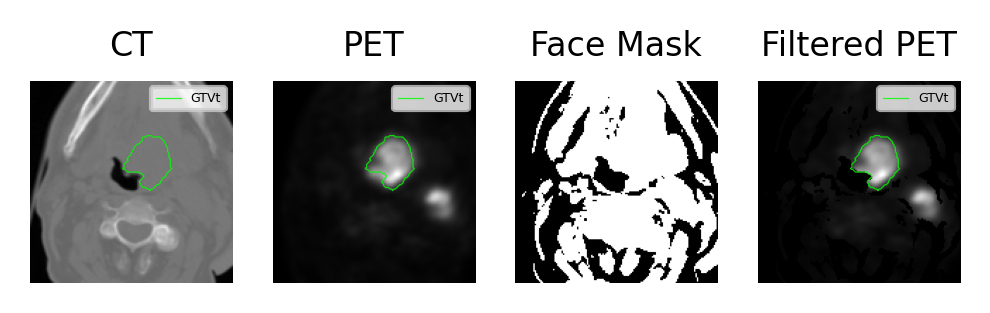

In [51]:
%matplotlib inline
import matplotlib.pyplot as plt
import SimpleITK as sitk
import os
from multiprocessing import Pool
import glob
import numpy as np

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 5}

pt = 'CHGJ007'
#_ct.nii.gz

print("processing patient no. ", pt)

CT_path = path_in + pt +'_ct.nii.gz'
PET_path = path_in + pt +'_pt.nii.gz'
gtv_path = path_in + pt + '_gtvt.nii.gz'

pet_img = sitk.ReadImage(PET_path)
pet = sitk.GetArrayFromImage(pet_img)

ct_img = sitk.ReadImage(CT_path)
ct = sitk.GetArrayFromImage(ct_img)

fm  = ct > 0

PTfm = pet*fm

gtv_img = sitk.ReadImage(gtv_path)
gtv = sitk.GetArrayFromImage(gtv_img)
from skimage import measure

contours = measure.find_contours(gtv[70,:,:], 0.5)[0]

plt.figure(figsize=(4, 1.5), dpi=300)
plt.set_cmap('gray')
ax0 = plt.subplot(141)
ax0.imshow(ct[70])
ax0.axis('off')
ax0.set_title('CT', fontsize=8)
ax0.plot(contours[:, 1], contours[:, 0], linewidth=0.3, label = 'GTVt', c='lime',  alpha = 0.8)
plt.legend(fontsize=3)

ax1 = plt.subplot(142)
ax1.imshow(pet[70])
ax1.axis('off')
ax1.set_title('PET', fontsize=8)
ax1.plot(contours[:, 1], contours[:, 0], linewidth=0.3, label = 'GTVt',c='lime',  alpha = 0.8)
plt.legend(fontsize=3)
ax2 = plt.subplot(143)
ax2.imshow(fm[70])
ax2.axis('off')
ax2.set_title('Face Mask', fontsize=8)
ax3 = plt.subplot(144)
ax3.imshow(PTfm[70])
ax3.axis('off')
ax3.set_title('Filtered PET', fontsize=8)
ax3.plot(contours[:, 1], contours[:, 0], linewidth=0.3, label = 'GTVt',c='lime',  alpha = 0.8)
plt.legend(fontsize=3)
plt.savefig('petfm.png', dpi =300)

## Visualize PET clipping

processing patient no.  CHUM054


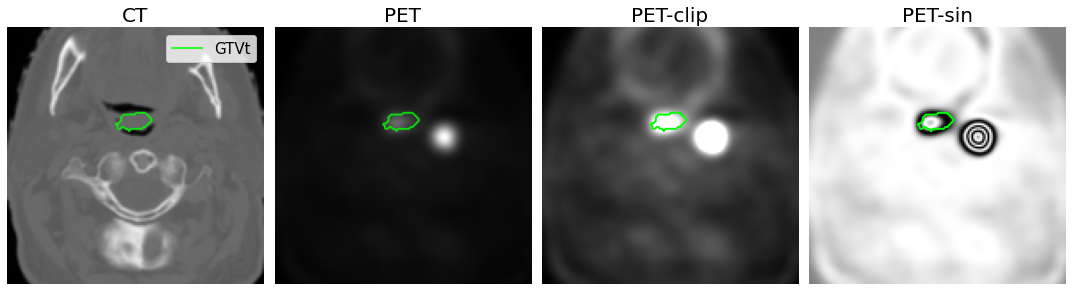

In [282]:
%matplotlib inline
import matplotlib.pyplot as plt
import SimpleITK as sitk
import os
from multiprocessing import Pool
import glob
import numpy as np



def load_nii(path):
    return sitk.GetArrayFromImage(sitk.ReadImage(path))
     

pt = 'CHUM054'
#_ct.nii.gz

print("processing patient no. ", pt)

CT_path = path_in + pt +'_ct.nii.gz'
PET_path = path_in + pt +'_pt.nii.gz'
PETc_path = path_in + pt + '_ptc.nii.gz'
PETcf_path = path_in + pt + '_ptsin.nii.gz'
gtv_path = path_in + pt + '_gtvt.nii.gz'

c_baseline_path = os.path.join('examples', pt+'_baseline.nii.gz')
c_petc_path = os.path.join('examples', pt+'_pet5.nii.gz')
c_pets_path = os.path.join('examples', pt+'_pets.nii.gz')


pet = load_nii(PET_path)
petc = load_nii(PETc_path)
pets = load_nii(PETcf_path)
ct = load_nii(CT_path)

gtv = load_nii(gtv_path)
c_baseline = load_nii(c_baseline_path)
c_petc = load_nii(c_petc_path)
c_pets = load_nii(c_pets_path)


from skimage import measure

contours = measure.find_contours(gtv[107,:,:], 0.5)[0]

contours_baseline = measure.find_contours(c_baseline[107,:,:], 0.5)[0]
contours_petc = measure.find_contours(c_petc[107,:,:], 0.5)[0]
contours_pets = measure.find_contours(c_pets[107,:,:], 0.5)[0]


PET_path = path_in + pt + '_ptc.nii.gz'

fm  = ct > 0



plt.figure(figsize=(15,4.2))
plt.set_cmap('gray')
ax0 = plt.subplot(141)
ax0.imshow(ct[107])
ax0.plot(contours[:, 1], contours[:, 0], linewidth=2, label='GTVt', c='lime',  alpha = 0.8)
ax0.axis('off')
ax0.set_title('CT', fontsize=20)

plt.legend(fontsize=15)

ax01 = plt.subplot(142)
ax01.imshow(pet[107], vmin=0, vmax=pet.max())
ax01.plot(contours[:, 1], contours[:, 0], linewidth=2, label='GTVt', c='lime',  alpha = 0.8)
#ax01.imshow(gtv[107],alpha=0.2)
ax01.axis('off')
ax01.set_title('PET', fontsize=20)


ax2 = plt.subplot(143)
ax2.imshow(petc[107], vmin=0, vmax=petc.max())
ax2.plot(contours[:, 1], contours[:, 0], linewidth=2, label='GTVt', c='lime')

ax2.axis('off')
ax2.set_title('PET-clip', fontsize=20)

ax1 = plt.subplot(144)
ax1.imshow(pets[107], vmin=pets.min(), vmax=pets.max())
ax1.plot(contours[:, 1], contours[:, 0], linewidth=2, label='GTVt', c='lime')

ax1.axis('off')
ax1.set_title('PET-sin', fontsize=20)

plt.tight_layout()

plt.savefig('Figure1.png', dpi = 600)
plt.savefig('Figure1.svg', dpi = 600)

In [240]:
!pip install medvis


 'CHUM054' slice_no = 107

processing patient no.  CHUM054


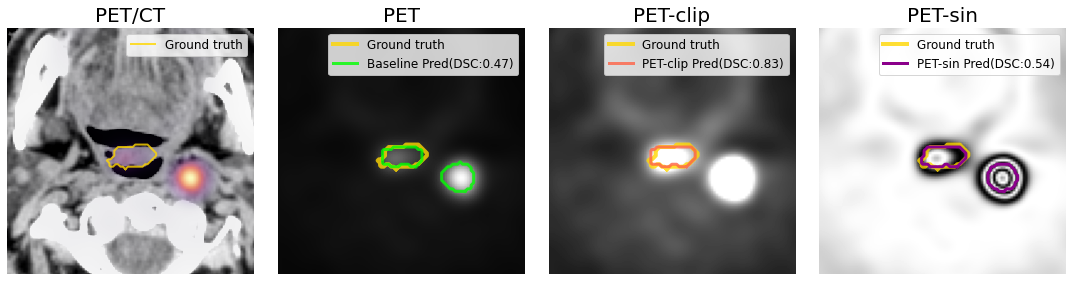

In [280]:
%matplotlib inline
import matplotlib.pyplot as plt
import SimpleITK as sitk
import os
from multiprocessing import Pool
import glob
import numpy as np
import medvis


def load_nii(path):
    return sitk.GetArrayFromImage(sitk.ReadImage(path))
     

def plot_contours(ax_num):
    for n, contour in enumerate(contours):
        if n == 0: 
            ax_num.plot(contour[:, 1], contour[:, 0], linewidth=4, label='GTVt', c='gold',  alpha = 0.8)
        else:
            ax_num.plot(contour[:, 1], contour[:, 0], linewidth=4, c='gold',  alpha = 0.8)
    for n, contour in enumerate(contours_baseline):
        if n == 0: 
            ax_num.plot(contour[:, 1], contour[:, 0], linewidth=2, label='Baseline', c='lime',  alpha = 0.8)
        else:
            ax_num.plot(contour[:, 1], contour[:, 0], linewidth=2, c='lime',  alpha = 0.8)  

    for n, contour in enumerate(contours_pets):
        if n == 0: 
            ax_num.plot(contour[:, 1], contour[:, 0], linewidth=2, label='PET Sin', c='magenta',  alpha = 0.8)
        else:
            ax_num.plot(contour[:, 1], contour[:, 0], linewidth=2, c='magenta',  alpha = 0.6)  
            
    for n, contour in enumerate(contours_petc):
        if n == 0: 
            ax_num.plot(contour[:, 1], contour[:, 0], linewidth=3, label='PET Clip', c='cyan',  alpha = 0.8)
        else:
            ax_num.plot(contour[:, 1], contour[:, 0], linewidth=3, c='cyan',  alpha = 0.8)     
            
pt = 'CHUM054'
slice_no = 107
#_ct.nii.gz

print("processing patient no. ", pt)

CT_path = path_in + pt +'_ct.nii.gz'
PET_path = path_in + pt +'_pt.nii.gz'
PETc_path = path_in + pt + '_ptc.nii.gz'
PETcf_path = path_in + pt + '_ptsin.nii.gz'
gtv_path = path_in + pt + '_gtvt.nii.gz'

c_baseline_path = os.path.join('examples', pt+'_baseline.nii.gz')
c_petc_path = os.path.join('examples', pt+'_pet5.nii.gz')
c_pets_path = os.path.join('examples', pt+'_pets.nii.gz')


pet = load_nii(PET_path)
petc = load_nii(PETc_path)
pets = load_nii(PETcf_path)
ct = load_nii(CT_path)

gtv = load_nii(gtv_path)
c_baseline = load_nii(c_baseline_path)
c_petc = load_nii(c_petc_path)
c_pets = load_nii(c_pets_path)


from skimage import measure

contours = measure.find_contours(gtv[slice_no,:,:], 0.5)
contours_baseline = measure.find_contours(c_baseline[slice_no,:,:], 0.5)
contours_petc = measure.find_contours(c_petc[slice_no,:,:], 0.5)
contours_pets = measure.find_contours(c_pets[slice_no,:,:], 0.5)


PET_path = path_in + pt + '_ptc.nii.gz'

fm  = ct > 0


plt.figure(figsize=(15,4))
plt.set_cmap('gray')

#plt.xlim(60, 200)
#plt.ylim(60, 200)

x_min, x_max, y_min, y_max = 20, 120, 0, 100

ax0 = plt.subplot(141)
ax0.imshow(ct[slice_no], vmin=-100, vmax=100)

blended_pet_image = medvis.apply_cmap_with_blend(pet[slice_no], 'magma')
ax0.imshow(blended_pet_image)

for n, contour in enumerate(contours):
    if n == 0: 
        ax0.plot(contour[:, 1], contour[:, 0], linewidth=2, label='Ground truth', c='gold',  alpha = 0.8)
    else:
        ax0.plot(contour[:, 1], contour[:, 0], linewidth=2, c='gold',  alpha = 0.8)
            
ax0.axis('off')
ax0.set_title('PET/CT', fontsize=20)
plt.axis([x_min, x_max, y_min, y_max])
plt.gca().invert_yaxis()
plt.legend(fontsize=12)

ax01 = plt.subplot(142)
ax01.imshow(pet[slice_no], vmin=0, vmax=pet.max())
for n, contour in enumerate(contours):
    if n == 0: 
        ax01.plot(contour[:, 1], contour[:, 0], linewidth=4, label='Ground truth', c='gold',  alpha = 0.8)
    else:
        ax01.plot(contour[:, 1], contour[:, 0], linewidth=4, c='gold',  alpha = 0.8)

for n, contour in enumerate(contours_baseline):
    if n == 0: 
        ax01.plot(contour[:, 1], contour[:, 0], linewidth=3, label='Baseline Pred(DSC:0.47)', c='lime',  alpha = 0.8)
    else:
        ax01.plot(contour[:, 1], contour[:, 0], linewidth=3, c='lime',  alpha = 0.8)  
plt.legend(fontsize=12) 
#x01.plot(contours[:, 1], contours[:, 0], linewidth=2, label='GTVt', c='lime',  alpha = 0.8)
#ax01.imshow(gtv[slice_no],alpha=0.2)
ax01.axis('off')
ax01.set_title('PET', fontsize=20)
plt.axis([x_min, x_max, y_min, y_max])
plt.gca().invert_yaxis()

ax2 = plt.subplot(143)
ax2.imshow(petc[slice_no], vmin=0, vmax=petc.max())
#x2.plot(contours[:, 1], contours[:, 0], linewidth=2, label='GTVt', c='lime')
for n, contour in enumerate(contours):
    if n == 0: 
        ax2.plot(contour[:, 1], contour[:, 0], linewidth=4, label='Ground truth', c='gold',  alpha = 0.8)
    else:
        ax2.plot(contour[:, 1], contour[:, 0], linewidth=4, c='gold',  alpha = 0.8)
        
for n, contour in enumerate(contours_petc):
    if n == 0: 
        ax2.plot(contour[:, 1], contour[:, 0], linewidth=3, label='PET-clip Pred(DSC:0.83)', c='tomato',  alpha = 0.8)
    else:
        ax2.plot(contour[:, 1], contour[:, 0], linewidth=3, c='tomato',  alpha = 0.8)   
plt.legend(fontsize=12)
        
ax2.axis('off')
ax2.set_title('PET-clip', fontsize=20)
plt.axis([x_min, x_max, y_min, y_max])
plt.gca().invert_yaxis()
ax1 = plt.subplot(144)
ax1.imshow(pets[slice_no], vmin=pets.min(), vmax=pets.max())
#ax1.plot(contours[:, 1], contours[:, 0], linewidth=2, label='GTVt', c='lime')
for n, contour in enumerate(contours):
    if n == 0: 
        ax1.plot(contour[:, 1], contour[:, 0], linewidth=4, label='Ground truth', c='gold',  alpha = 0.8)
    else:
        ax1.plot(contour[:, 1], contour[:, 0], linewidth=4, c='gold',  alpha = 0.8)
        
for n, contour in enumerate(contours_pets):
    if n == 0: 
        ax1.plot(contour[:, 1], contour[:, 0], linewidth=3, label='PET-sin Pred(DSC:0.54)', c='darkmagenta',  alpha = 1)
    else:
        ax1.plot(contour[:, 1], contour[:, 0], linewidth=3, c='darkmagenta',  alpha = 1)  
        
        
plt.legend(fontsize=12)
ax1.axis('off')
ax1.set_title('PET-sin', fontsize=20)

plt.axis([x_min, x_max, y_min, y_max])
plt.gca().invert_yaxis()

plt.tight_layout()

plt.savefig('Figure2_1.png', dpi = 600)
plt.savefig('Figure2_1.svg', dpi = 600)

##  CHUS065 slice_no = 107

processing patient no.  CHUS065


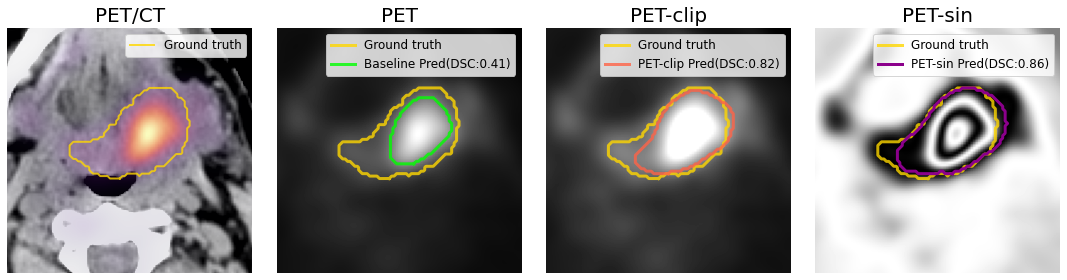

In [279]:
%matplotlib inline
import matplotlib.pyplot as plt
import SimpleITK as sitk
import os
from multiprocessing import Pool
import glob
import numpy as np
import medvis


def load_nii(path):
    return sitk.GetArrayFromImage(sitk.ReadImage(path))
     

def plot_contours(ax_num):
    for n, contour in enumerate(contours):
        if n == 0: 
            ax_num.plot(contour[:, 1], contour[:, 0], linewidth=4, label='GTVt', c='gold',  alpha = 0.8)
        else:
            ax_num.plot(contour[:, 1], contour[:, 0], linewidth=4, c='gold',  alpha = 0.8)
    for n, contour in enumerate(contours_baseline):
        if n == 0: 
            ax_num.plot(contour[:, 1], contour[:, 0], linewidth=2, label='Baseline', c='lime',  alpha = 0.8)
        else:
            ax_num.plot(contour[:, 1], contour[:, 0], linewidth=2, c='lime',  alpha = 0.8)  

    for n, contour in enumerate(contours_pets):
        if n == 0: 
            ax_num.plot(contour[:, 1], contour[:, 0], linewidth=2, label='PET Sin', c='magenta',  alpha = 0.8)
        else:
            ax_num.plot(contour[:, 1], contour[:, 0], linewidth=2, c='magenta',  alpha = 0.6)  
            
    for n, contour in enumerate(contours_petc):
        if n == 0: 
            ax_num.plot(contour[:, 1], contour[:, 0], linewidth=3, label='PET Clip', c='cyan',  alpha = 0.8)
        else:
            ax_num.plot(contour[:, 1], contour[:, 0], linewidth=3, c='cyan',  alpha = 0.8)     
            
pt = 'CHUS065'
slice_no = 104
#_ct.nii.gz

print("processing patient no. ", pt)

CT_path = path_in + pt +'_ct.nii.gz'
PET_path = path_in + pt +'_pt.nii.gz'
PETc_path = path_in + pt + '_ptc.nii.gz'
PETcf_path = path_in + pt + '_ptsin.nii.gz'
gtv_path = path_in + pt + '_gtvt.nii.gz'

c_baseline_path = os.path.join('examples', pt+'_baseline.nii.gz')
c_petc_path = os.path.join('examples', pt+'_pet5.nii.gz')
c_pets_path = os.path.join('examples', pt+'_pets.nii.gz')


pet = load_nii(PET_path)
petc = load_nii(PETc_path)
pets = load_nii(PETcf_path)
ct = load_nii(CT_path)

gtv = load_nii(gtv_path)
c_baseline = load_nii(c_baseline_path)
c_petc = load_nii(c_petc_path)
c_pets = load_nii(c_pets_path)


from skimage import measure

contours = measure.find_contours(gtv[slice_no,:,:], 0.5)
contours_baseline = measure.find_contours(c_baseline[slice_no,:,:], 0.5)
contours_petc = measure.find_contours(c_petc[slice_no,:,:], 0.5)
contours_pets = measure.find_contours(c_pets[slice_no,:,:], 0.5)


PET_path = path_in + pt + '_ptc.nii.gz'

fm  = ct > 0


plt.figure(figsize=(15,4))
plt.set_cmap('gray')

#plt.xlim(60, 200)
#plt.ylim(60, 200)

x_min, x_max, y_min, y_max = 40, 140, 0, 100

ax0 = plt.subplot(141)
ax0.imshow(ct[slice_no], vmin=-100, vmax=100)

blended_pet_image = medvis.apply_cmap_with_blend(pet[slice_no], 'magma')
ax0.imshow(blended_pet_image)

for n, contour in enumerate(contours):
    if n == 0: 
        ax0.plot(contour[:, 1], contour[:, 0], linewidth=2, label='Ground truth', c='gold',  alpha = 0.8)
    else:
        ax0.plot(contour[:, 1], contour[:, 0], linewidth=2, c='gold',  alpha = 0.8)
            
ax0.axis('off')
ax0.set_title('PET/CT', fontsize=20)
plt.axis([x_min, x_max, y_min, y_max])
plt.gca().invert_yaxis()
plt.legend(fontsize=12)

ax01 = plt.subplot(142)
ax01.imshow(pet[slice_no], vmin=0, vmax=pet.max())
for n, contour in enumerate(contours):
    if n == 0: 
        ax01.plot(contour[:, 1], contour[:, 0], linewidth=3, label='Ground truth', c='gold',  alpha = 0.8)
    else:
        ax01.plot(contour[:, 1], contour[:, 0], linewidth=3, c='gold',  alpha = 0.8)

for n, contour in enumerate(contours_baseline):
    if n == 0: 
        ax01.plot(contour[:, 1], contour[:, 0], linewidth=3, label='Baseline Pred(DSC:0.41)', c='lime',  alpha = 0.8)
    else:
        ax01.plot(contour[:, 1], contour[:, 0], linewidth=3, c='lime',  alpha = 0.8)  
plt.legend(fontsize=12) 
#x01.plot(contours[:, 1], contours[:, 0], linewidth=2, label='GTVt', c='lime',  alpha = 0.8)
#ax01.imshow(gtv[slice_no],alpha=0.2)
ax01.axis('off')
ax01.set_title('PET', fontsize=20)
plt.axis([x_min, x_max, y_min, y_max])
plt.gca().invert_yaxis()

ax2 = plt.subplot(143)
ax2.imshow(petc[slice_no], vmin=0, vmax=petc.max())
#x2.plot(contours[:, 1], contours[:, 0], linewidth=2, label='GTVt', c='lime')
for n, contour in enumerate(contours):
    if n == 0: 
        ax2.plot(contour[:, 1], contour[:, 0], linewidth=3, label='Ground truth', c='gold',  alpha = 0.8)
    else:
        ax2.plot(contour[:, 1], contour[:, 0], linewidth=3, c='gold',  alpha = 0.8)
        
for n, contour in enumerate(contours_petc):
    if n == 0: 
        ax2.plot(contour[:, 1], contour[:, 0], linewidth=3, label='PET-clip Pred(DSC:0.82)', c='tomato',  alpha = 0.8)
    else:
        ax2.plot(contour[:, 1], contour[:, 0], linewidth=3, c='tomato',  alpha = 0.8)   
plt.legend(fontsize=12)
        
ax2.axis('off')
ax2.set_title('PET-clip', fontsize=20)
plt.axis([x_min, x_max, y_min, y_max])
plt.gca().invert_yaxis()
ax1 = plt.subplot(144)
ax1.imshow(pets[slice_no], vmin=pets.min(), vmax=pets.max())
#ax1.plot(contours[:, 1], contours[:, 0], linewidth=2, label='GTVt', c='lime')
for n, contour in enumerate(contours):
    if n == 0: 
        ax1.plot(contour[:, 1], contour[:, 0], linewidth=3, label='Ground truth', c='gold',  alpha = 0.8)
    else:
        ax1.plot(contour[:, 1], contour[:, 0], linewidth=3, c='gold',  alpha = 0.8)
        
for n, contour in enumerate(contours_pets):
    if n == 0: 
        ax1.plot(contour[:, 1], contour[:, 0], linewidth=3, label='PET-sin Pred(DSC:0.86)', c='darkmagenta',  alpha = 1)
    else:
        ax1.plot(contour[:, 1], contour[:, 0], linewidth=3, c='darkmagenta',  alpha = 1)  
        
        
plt.legend(fontsize=12)
ax1.axis('off')
ax1.set_title('PET-sin', fontsize=20)

plt.axis([x_min, x_max, y_min, y_max])
plt.gca().invert_yaxis()

plt.tight_layout()

plt.savefig('Figure2_2.png', dpi = 600)
plt.savefig('Figure2_2.svg', dpi = 600)

In [111]:
from ipywidgets import *

pred_dir = '/mnt/faststorage/jintao/nnUNet/nnUNet_results/nnUNet/3d_fullres/Task221_hecktor_baseline/nnUNetTrainerV2__nnUNetPlansv2.1/test/'
pred_dir = '/mnt/faststorage/jintao/nnUNet/nnUNet_results/nnUNet/3d_fullres/Task221_hecktor_baseline/nnUNetTrainerV2__nnUNetPlansv2.1/post_threshold/'

npz = os.path.join(pred_dir,'CHUV001' +'.npz')
prob = np.load(npz)#.files

#print(np.load(npz).files)
#prob['softmax'][1]
#img = prob['softmax'][1]


def map_plot(images,  slicenr):
    plt.figure(figsize=(10,10))
    #plt.imshow(images[slicenr,:,:], vmin=0, vmax=1, cmap = 'gray')
    plt.imshow(images[slicenr,:,:]>0.5, cmap = 'gray')

    
    
#map_plot(pred['softmax'][0]*255, 50)

def update(n):
    map_plot(prob['softmax'][1].astype('float32'), slicenr=n)
    plt.show()
    
interact(update, n = 86);

interactive(children=(IntSlider(value=86, description='n', max=258, min=-86), Output()), _dom_classes=('widget…

1

In [116]:
from multiprocessing import Pool
import glob
import numpy as np
import SimpleITK as sitk
from pathlib import Path


import os
base_dir = '/mnt/faststorage/jintao/nnUNet/nnUNet_results/nnUNet/3d_fullres/Task228_hecktor_sine+pet/nnUNetTrainerV2__nnUNetPlansv2.1/'
pred_dir = base_dir +'test/'
post_threshold = base_dir + 'post_threshold/'

if not os.path.isdir(post_threshold):
    os.mkdir(post_threshold)
patient_list = sorted([f.name[:7] for f in Path(pred_dir).rglob("*.nii.gz")])

file_list = glob.glob(os.path.join(pred_dir, '*'))

#patient_list = ['CHUV001']

for p in patient_list:
    nii = os.path.join(pred_dir, p +'.nii.gz')
    npz = os.path.join(pred_dir, p +'.npz')
    new_npz_path = os.path.join(post_threshold, p)
    new_nii_path = os.path.join(post_threshold, p +'.nii.gz')  
    
    pred = sitk.ReadImage(nii)

    prob_fg = np.load(npz)['softmax'][1].astype('float32')
    prob_max = prob_fg.max()
    if prob_max< 0.5:
        prob_fg /= prob_max
        prob_bg = 1 - prob_fg
        print(prob_bg.shape)
        new_img = [prob_bg, prob_fg]

        new_pred = (prob_fg > 0.5 ).astype(np.int8)

        new_nii = sitk.GetImageFromArray(new_pred)

        new_nii.CopyInformation(pred)
        sitk.WriteImage(new_nii, new_nii_path) 

        np.savez_compressed(new_npz_path, softmax=new_img)
    
        print(p, 'finished.')
    #if np.sum(pred) < 10:
        #print(np.sum(pred))
        
        
    

(144, 144, 144)
CHUV001 finished.


In [91]:
import pickle
pkl= '/mnt/faststorage/jintao/nnUNet/nnUNet_results/nnUNet/3d_fullres/Task221_hecktor_baseline/nnUNetTrainerV2__nnUNetPlansv2.1/test/CHUV001.pkl'
with open(pkl, 'rb') as f:
    data = pickle.load(f)
    print(data)


OrderedDict([('original_size_of_raw_data', array([144, 144, 144])), ('original_spacing', array([1., 1., 1.])), ('list_of_data_files', ['/mnt/faststorage/jintao/nnUNet/nnUNet_raw_data_base/nnUNet_raw_data/Task221_hecktor_baseline/imagesTs/CHUV001_0000.nii.gz', '/mnt/faststorage/jintao/nnUNet/nnUNet_raw_data_base/nnUNet_raw_data/Task221_hecktor_baseline/imagesTs/CHUV001_0001.nii.gz']), ('seg_file', None), ('itk_origin', (-77.9296875, -247.4609375, 9.250335693359375)), ('itk_spacing', (1.0, 1.0, 1.0)), ('itk_direction', (1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)), ('crop_bbox', [[0, 144], [0, 144], [0, 144]]), ('classes', array([0])), ('size_after_cropping', (144, 144, 144)), ('size_after_resampling', (144, 144, 144)), ('spacing_after_resampling', array([1., 1., 1.]))])
